# Car fuel consumption

In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # 回帰問題における性能評価に関する関数
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### データの読み込み

In [15]:
df_consume = pd.read_excel("measurements2.xlsx")

In [16]:
# データ確認
display(df_consume.head())
display(df_consume.describe())
display(df_consume.info())
print('dataframeの行数・列数の確認==>\n', df_consume.shape)
print('欠損値の数を確認==>\n', df_consume.isnull().sum())

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
distance         388 non-null float64
consume          388 non-null float64
speed            388 non-null int64
temp_inside      376 non-null float64
temp_outside     388 non-null int64
specials         93 non-null object
gas_type         388 non-null object
AC               388 non-null int64
rain             388 non-null int64
sun              388 non-null int64
refill liters    13 non-null float64
refill gas       13 non-null object
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


None

dataframeの行数・列数の確認==>
 (388, 12)
欠損値の数を確認==>
 distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64


★specials, refill liters , refill gasは欠損値が多いため除外<br>
★temp_insideは平均値で埋める
★gas_typeはダミー変数に置き換える　今回は２つのため片方で十分→E10を残す

In [17]:
#除外
df_consume = df_consume.drop(['specials','refill liters','refill gas'], axis=1)
#欠損値０埋め
df_consume = df_consume.fillna(df_consume.mean())
# gas_typeのダミー変数に置き換え
df_consume_dummy = pd.get_dummies(df_consume['gas_type'])
df_consume = pd.concat([df_consume, df_consume_dummy] , axis=1)
df_consume = df_consume.drop(['gas_type','SP98'], axis=1)


In [18]:
# 再度データ確認
display(df_consume.head())
display(df_consume.describe())
display(df_consume.info())

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,E10
0,28.0,5.0,26,21.5,12,0,0,0,1
1,12.0,4.2,30,21.5,13,0,0,0,1
2,11.2,5.5,38,21.5,15,0,0,0,1
3,12.9,3.9,36,21.5,14,0,0,0,1
4,18.5,4.5,46,21.5,15,0,0,0,1


,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,E10
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,0.412371
std,22.667837,1.033172,13.598524,0.994666,6.991542,0.267443,0.329677,0.275441,0.492897
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,1.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
distance        388 non-null float64
consume         388 non-null float64
speed           388 non-null int64
temp_inside     388 non-null float64
temp_outside    388 non-null int64
AC              388 non-null int64
rain            388 non-null int64
sun             388 non-null int64
E10             388 non-null uint8
dtypes: float64(3), int64(5), uint8(1)
memory usage: 24.7 KB


None

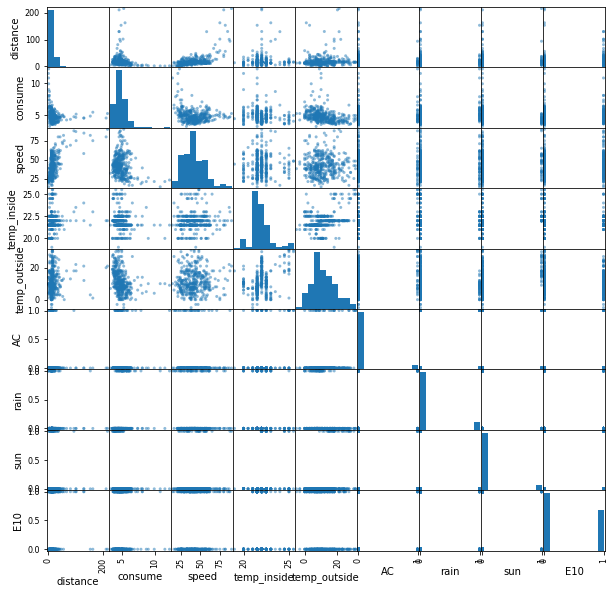

In [19]:
#散布図を確認
pd.plotting.scatter_matrix(df_consume, figsize=(10,10))
plt.show()

In [20]:
# 相関係数を確認
df_consume.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,E10
distance,1.000000,-0.128967,0.562299,0.075178,0.088175,-0.025738,-0.019791,0.081120,0.053411
consume,-0.128967,1.000000,-0.227866,-0.160623,-0.320811,0.096591,0.248118,-0.170667,0.015327
speed,0.562299,-0.227866,1.000000,0.059293,0.015411,-0.035408,0.009489,0.081618,0.097360
temp_inside,0.075178,-0.160623,0.059293,1.000000,0.359500,0.297376,-0.036937,0.242248,-0.010198
temp_outside,0.088175,-0.320811,0.015411,0.359500,1.000000,0.167562,-0.186315,0.346903,-0.148705
AC,-0.025738,0.096591,-0.035408,0.297376,0.167562,1.000000,0.242915,0.088598,-0.105285
rain,-0.019791,0.248118,0.009489,-0.036937,-0.186315,0.242915,1.000000,-0.112650,-0.060328
sun,0.081120,-0.170667,0.081618,0.242248,0.346903,0.088598,-0.112650,1.000000,-0.022761
E10,0.053411,0.015327,0.097360,-0.010198,-0.148705,-0.105285,-0.060328,-0.022761,1.000000


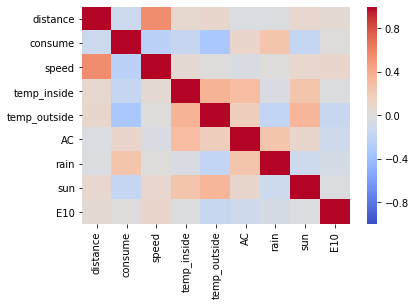

In [21]:
# 相関係数をヒートマップにして可視化
sns.heatmap(df_consume.corr(), cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

・distanceとspeedの相関が高い　→　consumeとの相関が高いspeedを説明変数に残す<br>
・temp_inside, temp_outside, sunの相関が高い　→consumeとの相関が高いtemp_outsideを説明変数に残す

In [22]:
y = df_consume['consume'].values
X = df_consume.drop(['consume','distance','temp_inside','sun'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### データを標準化する

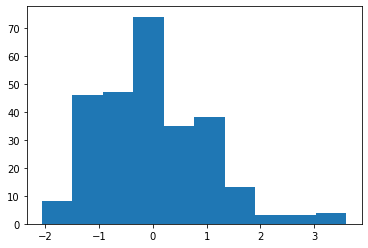

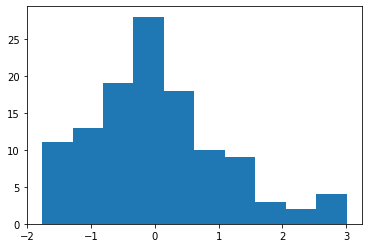

In [23]:
#データの標準化
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
stdsc.fit(X_train)
X_train_std = stdsc.transform(X_train)
plt.hist(X_train_std[:, 0]) #標準化後の1つ目の特徴に関するヒストグラム（学習用データ）
plt.show()
X_test_std = stdsc.transform(X_test)
plt.hist(X_test_std[:, 0]) #標準化後の1つ目の特徴に関するヒストグラム（テストデータ）
plt.show()

## 線形回帰を行う

In [25]:
from sklearn.linear_model import LinearRegression
# 係数を求める
liregr = LinearRegression(fit_intercept=True)
liregr.fit(X_train_std, y_train)

# 重みを取り出す
w0 = liregr.intercept_
w1 = liregr.coef_[0]
w2 = liregr.coef_[1]
w3 = liregr.coef_[2]
w4 = liregr.coef_[3]
w5 = liregr.coef_[4]

y_train_pred = liregr.predict(X_train_std)
y_test_pred = liregr.predict(X_test_std)
# 重みの確認
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, w4 = {:.3f}, w5 = {:.3f}'.format(w0, w1, w2, w3, w4, w5))

# MSEの計算
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)) )
# R^2の計算
print('R2 train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)) )

w0 = 4.878, w1 = -0.165, w2 = -0.304, w3 = 0.095, w4 = 0.189, w5 = -0.019
MSE train : 0.758, test : 1.093
R2 train : 0.200, test : 0.177


| |  MSE train  |  MSE test  |  R2 train  |  R2 test  |
| ---- | ---- | ---- | ---- | ---- |
| 線形回帰（標準化）|  0.758  |  1.093  |  0.200  |  0.177  |

## Ridge回帰を行う

In [68]:
from sklearn.linear_model import Ridge
ridg = Ridge(alpha=2, random_state=0)
ridg.fit(X_train_std, y_train)

y_train_pred = ridg.predict(X_train_std)
y_test_pred = ridg.predict(X_test_std)

# MSEの計算
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)) )
# R^2の計算
print('R2 train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)) )

MSE train : 0.758, test : 1.094
R2 train : 0.200, test : 0.177


alphaを手動で色々試したが、元の線形回帰より誤差が大きくなってしまった

| |  MSE train  |  MSE test  |  R2 train  |  R2 test  |
| ---- | ---- | ---- | ---- | ---- |
| 線形回帰（標準化）|  0.758  |  1.093  |  0.200  |  0.177  |
| リッジ　|  0.758  |  1.094  |  0.200  |  0.177  |

## SVR＋グリッドサーチを行う

In [84]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
# ハイパーパラメータのチューニング
# 計算に時間がかかるのである程度パラメーターを絞っておいた
# （1e-2～1e4まで12×12でやって最適値が'C': 0.123, 'epsilon': 1.520）
params_cnt = 20
params = {"C":np.logspace(0,1,params_cnt), "epsilon":np.logspace(-1,1,params_cnt)}
gridsearch = GridSearchCV(SVR(kernel="rbf", gamma="scale"), params, cv=5, scoring="r2", return_train_score=True, iid=False)
gridsearch.fit(X_train_std, y_train)
print("C, εのチューニング")
print("最適なパラメーター =", gridsearch.best_params_)
print("精度 =", gridsearch.best_score_)
print()

C, εのチューニング
最適なパラメーター = {'C': 3.3598182862837818, 'epsilon': 0.5455594781168519}
精度 = 0.21123215476139018



In [86]:
svr = SVR(kernel="rbf", gamma="scale", C=gridsearch.best_params_["C"], epsilon=gridsearch.best_params_["epsilon"])
svr.fit(X_train_std, y_train)

y_train_pred = svr.predict(X_train_std)
y_test_pred = svr.predict(X_test_std)

# MSEの計算
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)) )
# R^2の計算
print('R2 train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)) )

MSE train : 0.571, test : 0.945
R2 train : 0.397, test : 0.289


### SVRで予測精度が改善した<br>

| |  MSE train  |  MSE test  |  R2 train  |  R2 test  |
| ---- | ---- | ---- | ---- | ---- |
| 線形回帰（標準化）|  0.758  |  1.093  |  0.200  |  0.177  |
| リッジ　|  0.758  |  1.094  |  0.200  |  0.177  |
| SVR(rbfカーネル)　|  0.571  |  0.945  |  0.397  |  0.289  |

### ターゲット(consume)の分布を確認

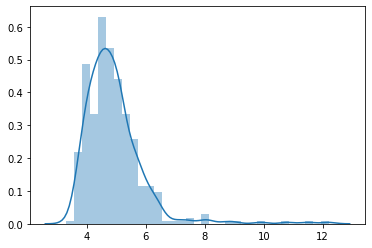

In [92]:
ax = sns.distplot(y)
plt.show()

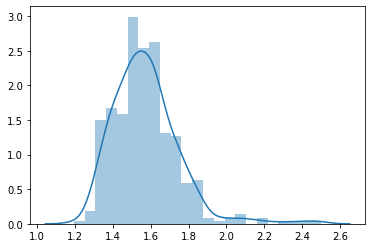

In [93]:
# 回帰問題はターゲットが正規分布の形のほうが精度が良いとネットでみたので
ax = sns.distplot(np.log(y))
plt.show()

In [87]:
log_y = np.log(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Training done using Random Forest


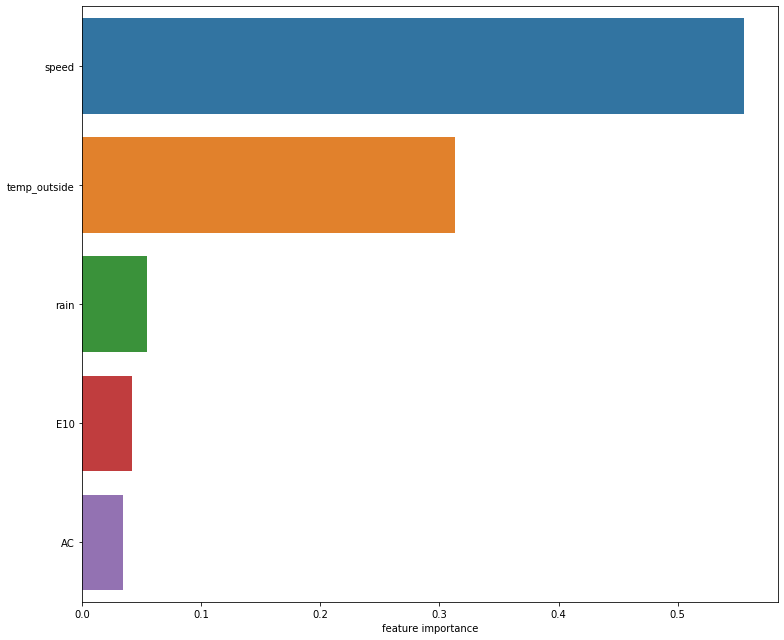

In [88]:
# feature importance using random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_features='auto')
rf.fit(X_train, y_train)
print('Training done using Random Forest')

ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(11, 9))
sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

## ランダムフォレスト

In [92]:
from sklearn.ensemble import RandomForestRegressor
# モデル構築
rf = RandomForestRegressor(n_estimators=100, criterion="gini", random_state=0)
rf.fit(X_train, y_train)

# 予測値を計算
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)
# MSEの計算
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)) )
# R^2の計算
from sklearn.metrics import r2_score
print('R2 train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)) )


NotFittedError: Estimator not fitted, call `fit` before exploiting the model.

## Adaboost

In [102]:
from sklearn.ensemble import AdaBoostRegressor
# モデル構築
adb = AdaBoostRegressor(n_estimators=100)
adb.fit(X_train, y_train)

# 予測値を計算
y_train_pred = adb.predict(X_train)
y_test_pred = adb.predict(X_test)
# MSEの計算
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)) )
# R^2の計算
from sklearn.metrics import r2_score
print('R2 train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)) )


MSE train : 0.011, test : 0.016
R2 train : 0.646, test : 0.559


## 勾配ブースティング

In [103]:
from sklearn.ensemble import GradientBoostingRegressor
# モデル構築
gbr = GradientBoostingRegressor(n_estimators=100)
gbr.fit(X_train, y_train)

# 予測値を計算
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)
# MSEの計算
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)) )
# R^2の計算
from sklearn.metrics import r2_score
print('R2 train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)) )


MSE train : 0.004, test : 0.015
R2 train : 0.877, test : 0.564


## xgboost （流行ってるっぽい）

In [104]:
# モデル構築
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train)

# 予測値を計算
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
# MSEの計算
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)) )
# R^2の計算
from sklearn.metrics import r2_score
print('R2 train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)) )


[14:59:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE train : 0.005, test : 0.015
R2 train : 0.827, test : 0.584


In [20]:
# グリッドサーチに必要なクラスのインポート
from sklearn.grid_search import GridSearchCV
# サーチするパラメータは範囲を指定
params = {'max_depth': [3, 5, 10], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, 10, 100], 'subsample': [0.8, 0.85, 0.9, 0.95], 'colsample_bytree': [0.5, 1.0]}
# モデルのインスタンス作成
mod = xgboost.XGBRegressor()
# 10-fold Cross Validationでパラメータ選定
cv = GridSearchCV(mod, params, cv = 10, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train, y_train)

ModuleNotFoundError: No module named 'sklearn.grid_search'

In [ ]:
y_train_pred = cv.predict(X_train)
y_test_pred = cv.predict(X_test)
# MSE
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)) )
# R^2
from sklearn.metrics import r2_score
print('R^2 train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)) )

# 出力
>>>print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)) )
MSE train : 1.742, test : 10.375
>>>print('R^2 train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)) )
R^2 train : 0.981, test : 0.855